In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

In [2]:
import warnings 
warnings.filterwarnings("ignore")

# 1. 실습 예제에 대해 코딩을 완료하고 평가하라

In [4]:
train_x.shape

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [5]:
# input layer
input_h = 28   # input height
input_w =  28  # input width
input_ch = 1   # input channel : Gray scale


# 1st convolution layer
k1_h = 3
k1_w =3
k1_ch =32
p1_h = 2
p1_w =2
# (None, 14, 14, 32)

# 2nd convolution layer
k2_h =3
k2_w =3
k2_ch =64
p2_h = 2
p2_w = 2
# (None, 7, 7, 64)

# Fully connected : flatten the features (7x7x64)
conv_result_size = 7 * 7 * 64  
n_hidden = 100
n_output = 10

In [6]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w,input_ch, 32 ], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, 32, 64], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([32], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([64], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)



Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
# [batch, height, width, channels]

def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides = [1, 1,1,1], padding = 'SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='VALID')
#   maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,p1_h,p1_w,1], padding='VALID')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides = [1, 1,1,1], padding = 'SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='VALID')
    maxp2_flatten = tf.reshape(maxp2, [-1, conv_result_size])

    # Fully connected
    hidden = tf.add(tf.matmul(maxp2_flatten, weights['hidden']), biases['hidden'])
    hidden = tf.nn.relu(hidden)
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])

    return output

# Loss function

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




Iter : 0
Train Loss : 2.4204819202423096
Cost : 2.5202531814575195
Iter : 250
Train Loss : 0.5118658542633057
Cost : 0.5379504561424255
Iter : 500
Train Loss : 0.28184613585472107
Cost : 0.4156639575958252
Iter : 750
Train Loss : 0.3559267520904541
Cost : 0.34558746218681335
Iter : 1000
Train Loss : 0.1396809071302414
Cost : 0.1710493266582489
Iter : 1250
Train Loss : 0.13727346062660217
Cost : 0.20827196538448334
Iter : 1500
Train Loss : 0.1687445044517517
Cost : 0.22445549070835114
Iter : 1750
Train Loss : 0.11549492180347443
Cost : 0.13796305656433105
Iter : 2000
Train Loss : 0.08784836530685425
Cost : 0.09344322234392166
Iter : 2250
Train Loss : 0.21089738607406616
Cost : 0.18047958612442017


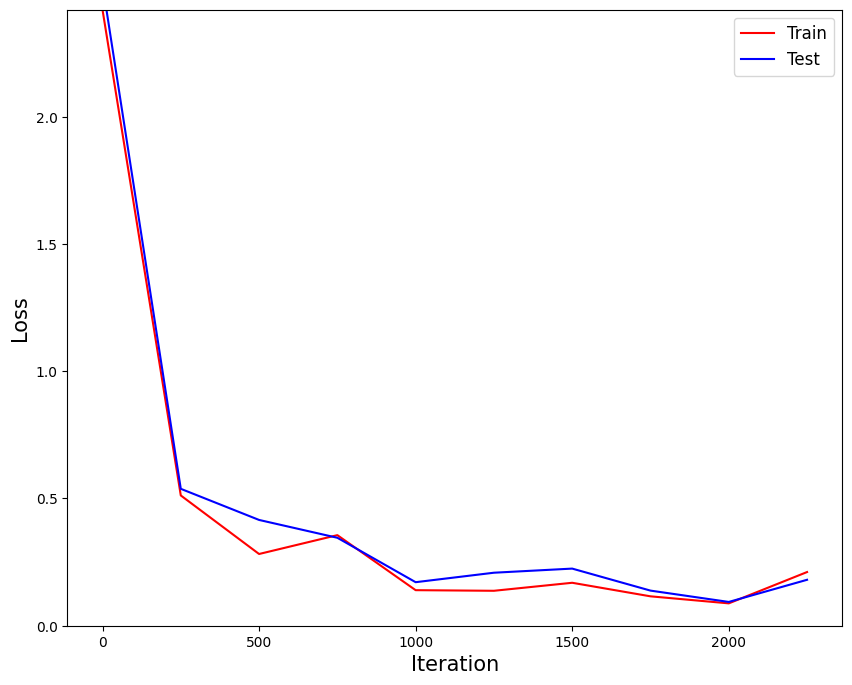

In [8]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    # train_x, train_y = mnist.train.next_batch(n_batch)
    # train_x = np.reshape(train_x, (-1, 28, 28, 1))
    # # train_x = np.reshape(train_x, (n_batch, input_h, input_w, input_ch))
    # sess.run(optm, feed_dict={x:train_x, y:train_y})

    # Get a random batch of training data
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    batch_x = np.reshape(batch_x, (-1, 28, 28, 1))
    # batch_x = np.reshape(batch_x, (n_batch, input_h, input_w, input_ch))
    # Convert labels to one-hot encoding if necessary
    batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=10)  # Adjust num_classes if needed

    sess.run(optm, feed_dict={x:batch_x, y:batch_y})

    if epoch % n_prt == 0:
        # test_x, test_y = mnist.test.next_batch(n_batch)
        # test_x = test_x.reshape((n_batch, input_h, input_w, input_ch))
        # c1 = sess.run(loss, feed_dict={x:train_x, y:train_y})
        # c2 = sess.run(loss, feed_dict={x:test_x, y:test_y})

        # Get a random batch of test data
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_batch_indices]
        test_batch_y = test_y[test_batch_indices]

        test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
        # Convert labels to one-hot encoding if necessary
        test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed
        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [9]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


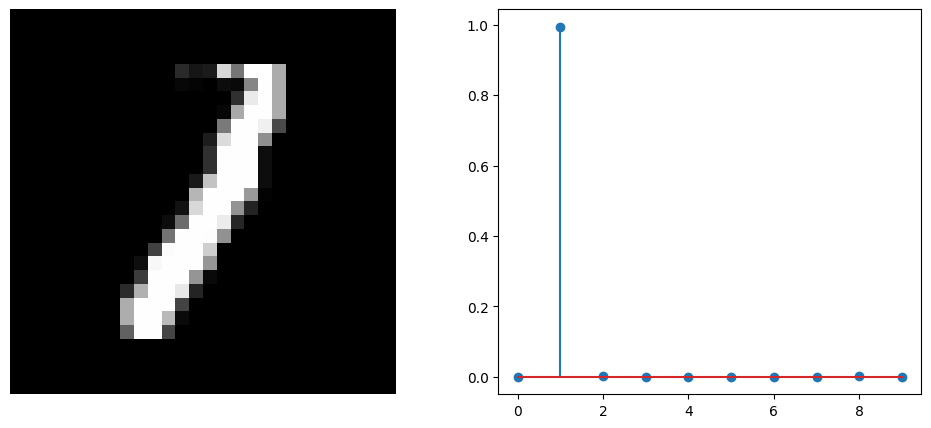

Prediction : 1
Probability : [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


In [10]:
# Get a random batch of test data
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

Iter: 0
Train Loss: 2.773247003555298
Test Loss: 2.560178518295288
Iter: 250
Train Loss: 0.6388778686523438
Test Loss: 0.6863555312156677
Iter: 500
Train Loss: 0.48631247878074646
Test Loss: 0.32627078890800476
Iter: 750
Train Loss: 0.1423468291759491
Test Loss: 0.22251760959625244
Iter: 1000
Train Loss: 0.3257046937942505
Test Loss: 0.35613274574279785
Iter: 1250
Train Loss: 0.3106037378311157
Test Loss: 0.2800906002521515
Iter: 1500
Train Loss: 0.4279753863811493
Test Loss: 0.09369535744190216
Iter: 1750
Train Loss: 0.15887251496315002
Test Loss: 0.08952900022268295
Iter: 2000
Train Loss: 0.03922070562839508
Test Loss: 0.15677866339683533
Iter: 2250
Train Loss: 0.11798656731843948
Test Loss: 0.0280621275305748


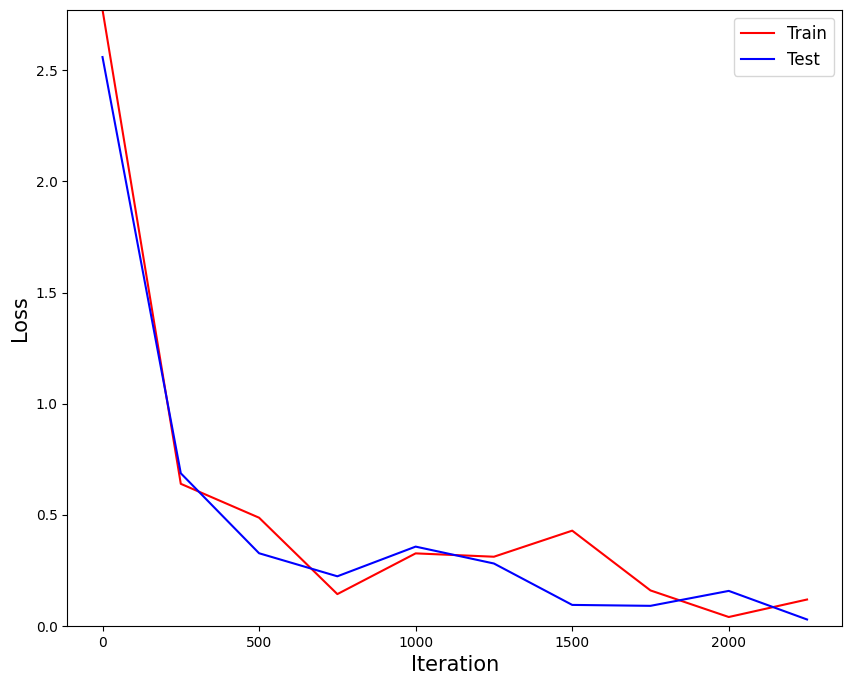

In [11]:
# Optimization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

train_x = np.expand_dims(train_x, axis=-1)  # (N, 28, 28, 1)
test_x = np.expand_dims(test_x, axis=-1)

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)



n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
# for epoch in range(n_iter):
#     train_x, train_y = mnist.train.next_batch(n_batch)
#     train_x = np.reshape(train_x, (-1, 28, 28, 1))
#     # train_x = np.reshape(train_x, (n_batch, input_h, input_w, input_ch))
#     sess.run(optm, feed_dict={x:train_x, y:train_y})

#     if epoch % n_prt == 0:
#         test_x, test_y = mnist.test.next_batch(n_batch)
#         test_x = test_x.reshape((n_batch, input_h, input_w, input_ch))
#         c1 = sess.run(loss, feed_dict={x:train_x, y:train_y})
#         c2 = sess.run(loss, feed_dict={x:test_x, y:test_y})

#         loss_record_train.append(c1)
#         loss_record_test.append(c2)
#         print("Iter : {}".format(epoch))
#         print("Train Loss : {}".format(c1))
#         print("Cost : {}".format(c2))

# plt.figure(figsize = (10,8))
# plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
# plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
# plt.xlabel('Iteration', fontsize = 15)
# plt.ylabel('Loss', fontsize = 15)
# plt.legend(fontsize = 12)
# plt.ylim([0, np.max(loss_record_train)])
# plt.show()


for epoch in range(n_iter):
    # 랜덤 배치 생성
    idx = np.random.choice(train_x.shape[0], n_batch, replace=False)
    batch_x = train_x[idx]
    batch_y = train_y[idx]

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_idx = np.random.choice(test_x.shape[0], n_batch, replace=False)
        test_batch_x = test_x[test_idx]
        test_batch_y = test_y[test_idx]

        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)

        print(f"Iter: {epoch}")
        print(f"Train Loss: {c1}")
        print(f"Test Loss: {c2}")

# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r', label='Train')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b', label='Test')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

## 2. 위의 문제에서 Convolution Layer(conv3), Fully connected layer(FC2) 를 1개씩 추가 >>> 정확도 check

Iter: 0, Train Loss: 2.9702, Test Loss: 2.8241
Iter: 250, Train Loss: 0.3409, Test Loss: 0.4229
Iter: 500, Train Loss: 0.3515, Test Loss: 0.1756
Iter: 750, Train Loss: 0.2085, Test Loss: 0.2043
Iter: 1000, Train Loss: 0.0368, Test Loss: 0.1625
Iter: 1250, Train Loss: 0.0211, Test Loss: 0.0636
Iter: 1500, Train Loss: 0.1262, Test Loss: 0.0611
Iter: 1750, Train Loss: 0.1141, Test Loss: 0.0300
Iter: 2000, Train Loss: 0.0331, Test Loss: 0.0838
Iter: 2250, Train Loss: 0.0572, Test Loss: 0.0872


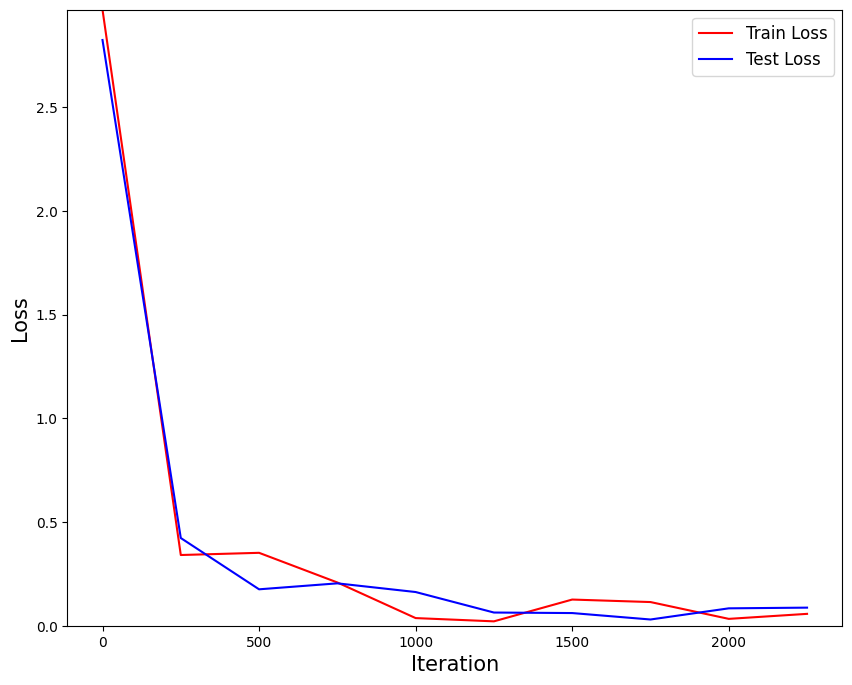

Accuracy: 98.00%


In [45]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x / 255.0, test_x / 255.0
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

input_h, input_w, input_ch = 28, 28, 1
k1_ch, k2_ch, k3_ch = 32, 64, 128

p1_h = p1_w = 2

conv_result_size = 4 * 4 * 128
n_fc1 = 100
n_fc2 = 628
n_output = 10

weights = {
    'conv1': tf.Variable(tf.random.normal([3, 3, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([3, 3, k1_ch, k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([3, 3, k2_ch, k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([conv_result_size, n_fc1], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_fc1, n_fc2], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_fc2, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([n_fc1], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_fc2], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

def net(x, weights, biases):
    conv1 = tf.nn.relu(tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME') + biases['conv1'])
    maxp1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    conv2 = tf.nn.relu(tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME') + biases['conv2'])
    maxp2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    conv3 = tf.nn.relu(tf.nn.conv2d(maxp2, weights['conv3'], strides=[1,1,1,1], padding='SAME') + biases['conv3'])

    # 7by7by128 > 4by4by128 로 차원이 변경되는 구조 
    # 풀링시 padding 옵션을 same으로 설정하고 stride를 2로 해야 계산 가능
    maxp3 = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    flat = tf.reshape(maxp3, [-1, conv_result_size])
    fc1 = tf.nn.relu(tf.matmul(flat, weights['fc1']) + biases['fc1'])
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['fc2']) + biases['fc2'])
    output = tf.matmul(fc2, weights['output']) + biases['output']
    return output

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):
    idx = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[idx]
    batch_y = tf.keras.utils.to_categorical(train_y[idx], num_classes=10)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        t_idx = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        t_x = test_x[t_idx]
        t_y = tf.keras.utils.to_categorical(test_y[t_idx], num_classes=10)

        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: t_x, y: t_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter: {}, Train Loss: {:.4f}, Test Loss: {:.4f}".format(epoch, c1, c2))

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label='Train Loss')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label='Test Loss')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

test_idx = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_idx].reshape((-1, 28, 28, 1))
test_batch_y = tf.keras.utils.to_categorical(test_y[test_idx], num_classes=10)

pred_labels = sess.run(pred, feed_dict={x: test_batch_x})
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(test_batch_y, axis=1)
accr = np.mean(np.equal(pred_labels, true_labels))
print("Accuracy: {:.2f}%".format(accr * 100))
